In [11]:
import pandas as pd
df = pd.read_csv("loan.csv")
df.head()

C:\Users\21985\AppData\Local\Temp\ipykernel_7584\1802865421.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
#Find out the revol_util which has blank utilization
df_MissRevolutil = df[df['revol_util'].isna()].copy()
df_MissRevolutil.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
3565,1016416,1244120,8000,8000,8000.0,36 months,19.42%,294.95,E,E3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4714,997734,1222858,6100,6100,6100.0,36 months,14.27%,209.29,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4943,790093,994164,7200,7200,7200.0,36 months,14.27%,247.03,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
11282,817195,1024992,5000,5000,5000.0,36 months,21.36%,189.31,F,F4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12042,804073,1009899,3000,3000,3000.0,60 months,22.11%,83.05,G,G1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
df2 = df.dropna(subset=['revol_util']).copy()

In [14]:
df2['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
df2['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39667, dtype: float64

### Create Binning for the "revol_util"
### Utilization Bins
1. 0%-20%
2. 20%-40%
3. 40%-60%
4. 60%-80%
5. 80%-100%

In [31]:
def createRevolUtilBin(x):
    if x>80:
        return "80%-100%"
    elif 60<x and x<=80:
        return "60%-80%"
    elif 40<x and x<=60:
        return "40%-60%"
    elif 20<x and x<=40:
        return "20%-40%"
    elif x<=20:
        return "0%-20%"
    else:
        return "Error"
df2.loc[:, 'revol_util_range'] = df2["revol_util"].apply(createRevolUtilBin)
df1 = df2[['revol_util_range','revol_util']]
df1.sort_values(by = 'revol_util')

,revol_util_range,revol_util
26001,0%-20%,0.0
17851,0%-20%,0.0
37025,0%-20%,0.0
11982,0%-20%,0.0
18850,0%-20%,0.0
...,...,...
28811,80%-100%,99.9
23822,80%-100%,99.9
23767,80%-100%,99.9
5499,80%-100%,99.9


In [25]:
piv_ls_util_range = df2.groupby(['revol_util_range', 'loan_status']).size().unstack(fill_value=0).reset_index()
piv_ls_util_range['Total'] = piv_ls_util_range['Charged Off'] + piv_ls_util_range['Fully Paid'] + piv_ls_util_range['Current']
piv_ls_util_range['ChargedOff_%'] = round(piv_ls_util_range['Charged Off']*100/piv_ls_util_range['Total'])
piv_ls_util_range['Current_%'] = round(piv_ls_util_range['Current']*100/piv_ls_util_range['Total'])
piv_ls_util_range['Fully_Paid_%'] = round(piv_ls_util_range['Fully Paid']*100/piv_ls_util_range['Total'])


piv_ls_util_range_sorted = piv_ls_util_range.sort_values(by='ChargedOff_%')
piv_ls_util_range_sorted

loan_status,revol_util_range,Charged Off,Current,Fully Paid,Total,ChargedOff_%,Current_%,Fully_Paid_%
0,0%-20%,770,156,6990,7916,10.0,2.0,88.0
1,20%-40%,915,220,6790,7925,12.0,3.0,86.0
2,40%-60%,1236,257,7172,8665,14.0,3.0,83.0
3,60%-80%,1356,286,6658,8300,16.0,3.0,80.0
4,80%-100%,1334,221,5306,6861,19.0,3.0,77.0


Text(0.5, 1.0, 'Charged Off Percentage w.r.t increasing Revolving Utilization Range')

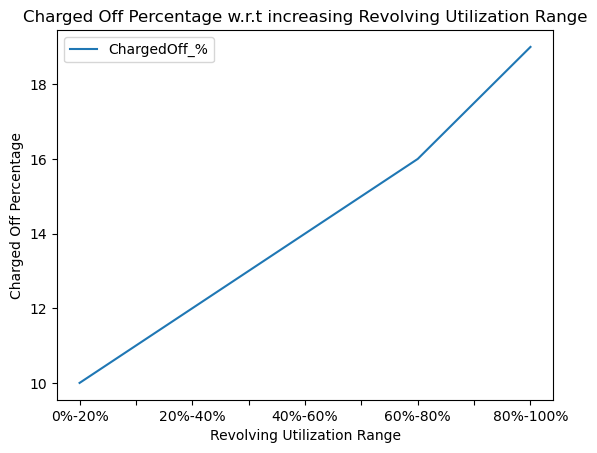

In [26]:
import matplotlib.pyplot as plt
piv_ls_util_range_sorted.plot(x='revol_util_range', y='ChargedOff_%', kind='line')
plt.xlabel('Revolving Utilization Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage w.r.t increasing Revolving Utilization Range')

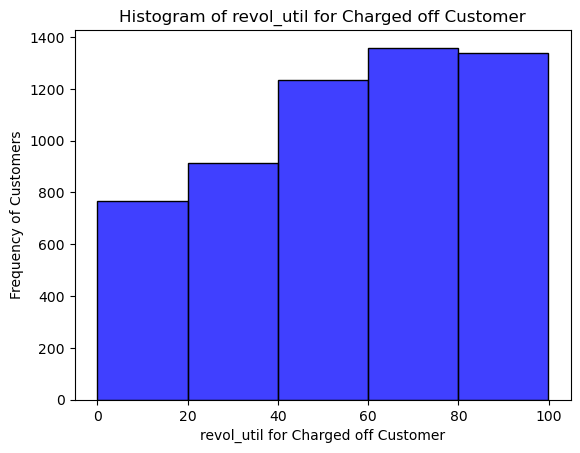

In [27]:
Charged_Off_df = df2[df2['loan_status']=='Charged Off']
Charged_Off_df['revol_util'].info

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(Charged_Off_df['revol_util'], bins=5 , color='blue')

plt.title('Histogram of revol_util for Charged off Customer')
plt.xlabel('revol_util for Charged off Customer')
plt.ylabel('Frequency of Customers')

plt.show()

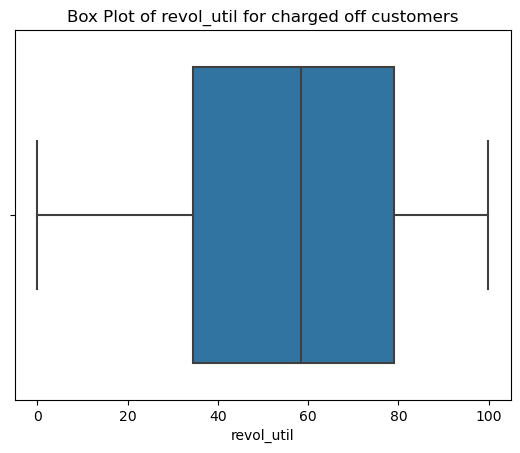

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='revol_util', data=Charged_Off_df)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

### From the above line chart and histogram  we can infer the following:
1. Increased likely-hood with Increasing utilization
2. People with high credit utilization are more likely to be defaulters when compared to people with lesser utilization.
3. People with utilization <30% can be our ideal customers
4. Frequency distrubtuion is highest for the people with highest utilization.
5. From the box plot we can see that the median is close to 60%.

In [20]:
piv_ls_purpose = (df2.groupby(['purpose','loan_status'])['loan_status']).count().T
piv_ls_purpose = df2.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0).reset_index()
piv_ls_purpose['Total'] = piv_ls_purpose['Charged Off'] + piv_ls_purpose['Fully Paid'] + piv_ls_purpose['Current']
piv_ls_purpose['ChargedOff_%'] = round(piv_ls_purpose['Charged Off']*100/piv_ls_purpose['Total'])
piv_ls_purpose['Current_%'] = round(piv_ls_purpose['Current']*100/piv_ls_purpose['Total'])
piv_ls_purpose['Fully_Paid_%'] = round(piv_ls_purpose['Fully Paid']*100/piv_ls_purpose['Total'])
piv_ls_purpose_sorted = piv_ls_purpose.sort_values(by='ChargedOff_%')
piv_ls_purpose_sorted

loan_status,purpose,Charged Off,Current,Fully Paid,Total,ChargedOff_%,Current_%,Fully_Paid_%
0,car,159,50,1338,1547,10.0,3.0,86.0
6,major_purchase,221,37,1923,2181,10.0,2.0,88.0
13,wedding,96,21,829,946,10.0,2.0,88.0
1,credit_card,541,103,4484,5128,11.0,2.0,87.0
4,home_improvement,344,101,2526,2971,12.0,3.0,85.0
12,vacation,53,6,321,380,14.0,2.0,84.0
2,debt_consolidation,2762,586,15281,18629,15.0,3.0,82.0
5,house,59,14,308,381,15.0,4.0,81.0
7,medical,105,12,574,691,15.0,2.0,83.0
8,moving,92,7,482,581,16.0,1.0,83.0


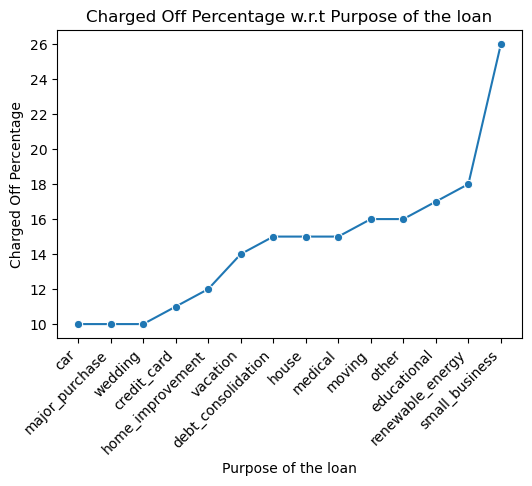

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.lineplot(data=piv_ls_purpose_sorted, x='purpose', y='ChargedOff_%', marker='o')
plt.xlabel('Purpose of the loan')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage w.r.t Purpose of the loan')
plt.xticks(rotation=45, ha='right') 
plt.show()


### From the above line chart and histogram  we can infer the following:
1. Customer with Small_business are likely to be charged off compared to other businesses


loan_amnt: The loan amount requested.
int_rate: The interest rate on the loan.
annual_inc: The borrower's annual income.
dti: Debt-to-Income ratio.
delinq_2yrs: Number of delinquencies in the borrower's credit file.
revol_util: Revolving line utilization rate.
open_acc: Number of open credit lines.
pub_rec: Number of derogatory public records.

In [40]:
import pandas as pd

Column_for_correlation = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'open_acc', 'pub_rec']


#Below Correlation is for Charged Off  customers
df_charged_off = df2[df2['loan_status']=='Charged Off']
Charged_off_sliced_df = df_charged_off[Column_for_correlation]
Charged_off_Corr_matrix = Charged_off_sliced_df.corr()
Charged_off_Corr_matrix


C:\Users\21985\AppData\Local\Temp\ipykernel_7584\2608116686.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Charged_off_Corr_matrix = Charged_off_sliced_df.corr()


,loan_amnt,annual_inc,dti,delinq_2yrs,revol_util,open_acc,pub_rec
loan_amnt,1.000000,0.351397,0.063194,-0.029928,0.042634,0.182227,-0.048471
annual_inc,0.351397,1.000000,-0.090283,0.021609,0.071373,0.210892,-0.007214
dti,0.063194,-0.090283,1.000000,-0.068718,0.227279,0.299920,0.007812
delinq_2yrs,-0.029928,0.021609,-0.068718,1.000000,-0.101581,-0.018203,-0.001584
revol_util,0.042634,0.071373,0.227279,-0.101581,1.000000,-0.056673,0.058880
open_acc,0.182227,0.210892,0.299920,-0.018203,-0.056673,1.000000,0.048888
pub_rec,-0.048471,-0.007214,0.007812,-0.001584,0.058880,0.048888,1.000000
